In [6]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Large Random Samples

In [7]:
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)

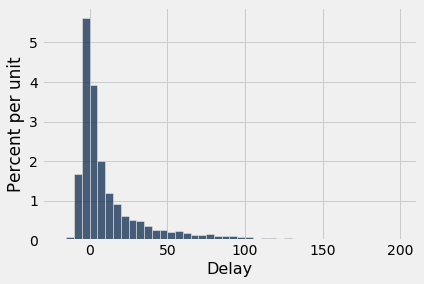

In [8]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

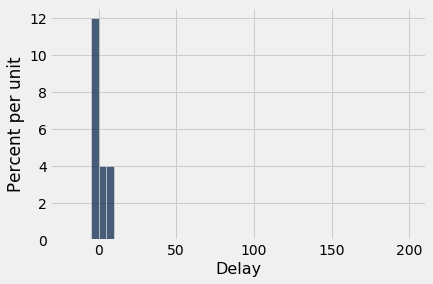

In [9]:
# (Sample) Empirical Distribution
united.sample(10).hist('Delay', bins = united_bins)

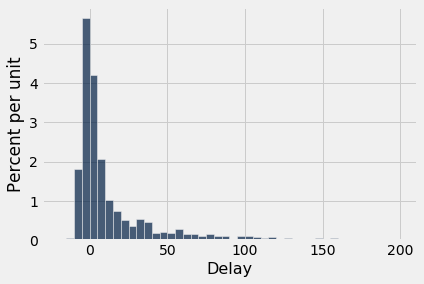

In [10]:
# (Sample) Empirical Distribution
united.sample(1000).hist('Delay', bins = united_bins)

## Statistics

In [24]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [27]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

3.0

In [31]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))

2.0

### Probability & Empirical Distributions of a Statistic

In [14]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [15]:
sample_median(10)

-1.0

In [16]:
num_simulations = 2000

In [17]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

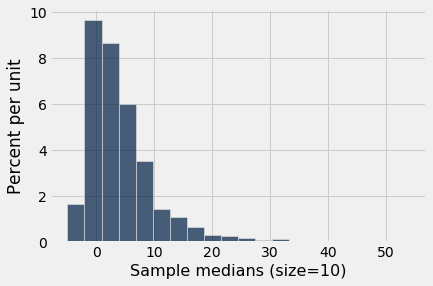

In [18]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [19]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

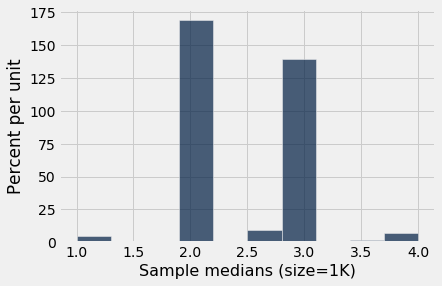

In [20]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist()

#### Empirical Distributions Overlayed

In [21]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [22]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

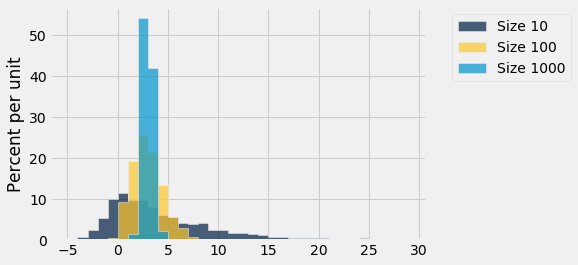

In [23]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [32]:
# Set up the population: 26% are black, 74% are not
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

In [36]:
# Draw a sample of 100 from the population
sample_proportions(100, population_proportions)

array([0.2, 0.8])

In [37]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [40]:
panel_proportion()

0.31

In [41]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

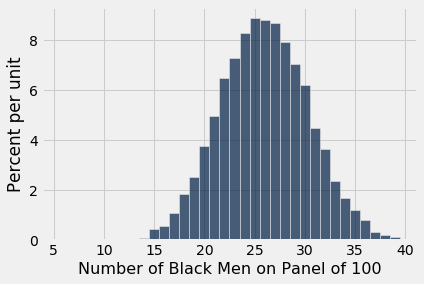

In [42]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

## Mendel and Pea Flowers ##

In [43]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [46]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.74703983, 0.25296017])

In [47]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [48]:
purple_flowers()

76.21097954790098

In [49]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

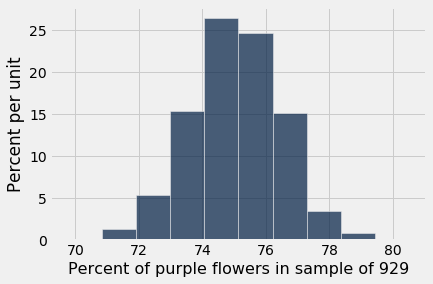

In [50]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

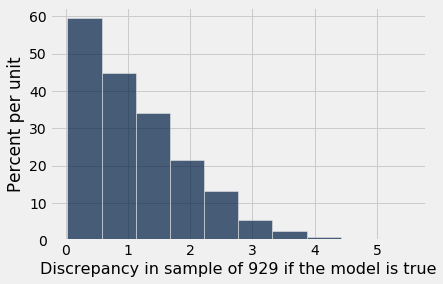

In [51]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [52]:
abs(observed_purples * 100 - 75)

1.318622174381062